In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['target'] = mnist.target.astype(int)

In [3]:
X_tr, y_tr = mnist.data[:10_000], mnist.target[:10_000]
X_ts, y_ts = mnist.data[10_000:12_000], mnist.target[10_000:12_000]

In [4]:
import numpy as np

fives_train = X_tr[y_tr == 5]
fives_labels = np.ones_like(y_tr[y_tr == 5])

threes_train = X_tr[y_tr == 3]
threes_labels = -1 * np.ones_like(y_tr[y_tr == 3])

In [5]:
xtr_53 = np.r_[fives_train, threes_train]
ytr_53 = np.r_[fives_labels, threes_labels]

In [9]:
fives_train.shape

(863, 784)

In [10]:
threes_train.shape

(1032, 784)

In [6]:
xts_53 = np.r_[X_ts[y_ts == 5], X_ts[y_ts == 3]]
yts_53 = np.r_[np.ones_like(y_ts[y_ts == 5]), -1 * np.ones_like(y_ts[y_ts == 3])]

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
perc = Perceptron(random_state=42, eta0=1, max_iter=1, shuffle=True)

for i in range(100):
    perc.partial_fit(xtr_53, ytr_53, [-1, 1])

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.metrics import plot_confusion_matrix

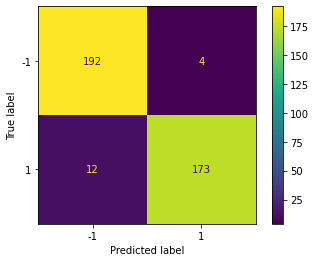

In [15]:
plot_confusion_matrix(perc, xts_53, yts_53)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=10, random_state=1)

In [41]:
x_red_tr = pca.fit_transform(xtr_53)
perc = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, alpha=0, fit_intercept=True)
perc.fit(x_red_tr, ytr_53)

# for i in range(100):
#     perc.partial_fit(x_red_tr, ytr_53, [-1, 1])

Perceptron(alpha=0, eta0=1, max_iter=100, random_state=42)

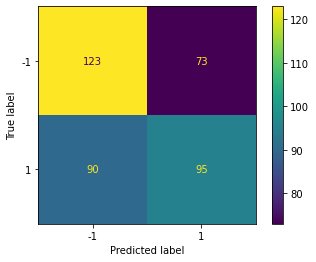

In [42]:
x_red_ts = pca.fit_transform(xts_53)

plot_confusion_matrix(perc, x_red_ts, yts_53)

In [40]:
Perceptron?

Init signature:
Perceptron(
    *,
    penalty=None,
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    eta0=1.0,
    n_jobs=None,
    random_state=0,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
)
Docstring:     
Perceptron

Read more in the :ref:`User Guide <perceptron>`.

Parameters
----------

penalty : {'l2','l1','elasticnet'}, default=None
    The penalty (aka regularization term) to be used.

alpha : float, default=0.0001
    Constant that multiplies the regularization term if regularization is
    used.

l1_ratio : float, default=0.15
    The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
    `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
    Only used if `penalty='elasticnet'`.

    .. versionadded:: 0.24

fit_intercept : bool, default=True
    Whether the intercept should be estimated or not. If 